# Import libraries  

In [4]:
import pandas as pd
import numpy as np
import requests 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
import sklearn



# Import dataset

In [5]:
dataset = pd.read_csv('draft.csv')

In [6]:
nRow, nCol = dataset.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 37843 rows and 73 columns


In [7]:
dataset.head(5)

,REGION,ABIRTH_YEAR,EGENDER,AGENDER,RHISPANIC,AHISPANIC,RRACE,ARACE,EEDUC,AEDUC,...,MH_NOTGET,SEEING,HEARING,REMEMBERING,MOBILITY,TENURE,LIVQTRRV,TNUM_PS,INCOME,ANXIOUS
0,3,2,2,2,1,2,2,2,6,2,...,2,1,1,1,1,2,2,1,4,1
1,2,2,1,2,1,2,1,2,7,2,...,2,1,1,1,1,2,2,0,5,2
2,2,2,2,2,1,2,1,2,7,2,...,2,1,1,1,1,2,2,1,6,1
3,4,2,2,2,1,2,3,1,4,2,...,2,1,1,1,1,2,5,0,6,1
4,4,2,1,2,1,2,1,2,7,2,...,2,1,2,1,1,3,2,0,4,1


In [8]:
col_names = dataset.columns

col_names

Index(['REGION', 'ABIRTH_YEAR', 'EGENDER', 'AGENDER', 'RHISPANIC', 'AHISPANIC',
       'RRACE', 'ARACE', 'EEDUC', 'AEDUC', 'MS', 'THHLD_NUMPER',
       'AHHLD_NUMPER', 'THHLD_NUMKID', 'AHHLD_NUMKID', 'THHLD_NUMADLT',
       'ACTVDUTY1', 'RECVDVACC', 'DOSES', 'COVPRVNT', 'WRKLOSSRV', 'EXPCTLOSS',
       'ANYWORK', 'TW_YN', 'WKVOL', 'UI_APPLYRV', 'UI_RECVRV', 'SSA_RECV',
       'SSA_APPLYRV', 'SSADECISN', 'EIP_YN', 'EXPNS_DIF', 'CHNGSHOP1',
       'CHNGSHOP2', 'CHNGSHOP3', 'CHNGSVCS1', 'CHNGSVCS2', 'CHNGSVCS3',
       'CASHUSE', 'SPNDSRC1', 'PRVRIDESHR', 'PLNDTRIPS', 'CURFOODSUF',
       'FREEFOOD', 'SNAP_YN', 'WORRY', 'INTEREST', 'DOWN', 'HLTHINS1',
       'HLTHINS2', 'HLTHINS3', 'HLTHINS4', 'HLTHINS5', 'HLTHINS6', 'HLTHINS7',
       'HLTHINS8', 'PRIVHLTH', 'PUBHLTH', 'DELAY', 'NOTGET', 'TELEHLTH',
       'PRESCRIPT', 'MH_SVCS', 'MH_NOTGET', 'SEEING', 'HEARING', 'REMEMBERING',
       'MOBILITY', 'TENURE', 'LIVQTRRV', 'TNUM_PS', 'INCOME', 'ANXIOUS'],
      dtype='object')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37843 entries, 0 to 37842
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   REGION         37843 non-null  int64
 1   ABIRTH_YEAR    37843 non-null  int64
 2   EGENDER        37843 non-null  int64
 3   AGENDER        37843 non-null  int64
 4   RHISPANIC      37843 non-null  int64
 5   AHISPANIC      37843 non-null  int64
 6   RRACE          37843 non-null  int64
 7   ARACE          37843 non-null  int64
 8   EEDUC          37843 non-null  int64
 9   AEDUC          37843 non-null  int64
 10  MS             37843 non-null  int64
 11  THHLD_NUMPER   37843 non-null  int64
 12  AHHLD_NUMPER   37843 non-null  int64
 13  THHLD_NUMKID   37843 non-null  int64
 14  AHHLD_NUMKID   37843 non-null  int64
 15  THHLD_NUMADLT  37843 non-null  int64
 16  ACTVDUTY1      37843 non-null  int64
 17  RECVDVACC      37843 non-null  int64
 18  DOSES          37843 non-null  int64
 19  COVP

# Chi-Squared Feature Selection

Feature 0: 6.717664
Feature 1: 0.005529
Feature 2: 217.037540
Feature 3: 0.016366
Feature 4: 23.954127
Feature 5: 0.025073
Feature 6: 3.532810
Feature 7: 0.036407
Feature 8: 44.792496
Feature 9: 0.005329
Feature 10: 651.150227
Feature 11: 15.862696
Feature 12: 0.108389
Feature 13: 105.517108
Feature 14: 0.001156
Feature 15: 8.678535
Feature 16: nan
Feature 17: nan
Feature 18: 0.404654
Feature 19: 45.825810
Feature 20: 41.098723
Feature 21: 23.318034
Feature 22: 7.852257
Feature 23: 58.743435
Feature 24: 5.221829
Feature 25: 5.698160
Feature 26: 3.160477
Feature 27: 0.573821
Feature 28: 0.778079
Feature 29: 152.827836
Feature 30: 1.390125
Feature 31: 4805.177781
Feature 32: 279.451622
Feature 33: 103.487399
Feature 34: 177.611831
Feature 35: 50.270645
Feature 36: 49.278269
Feature 37: 13.290266
Feature 38: 61.153182
Feature 39: nan
Feature 40: 40.306921
Feature 41: 87.781242
Feature 42: 2220.158910
Feature 43: 3.454711
Feature 44: 5.088050
Feature 45: 23364.918225
Feature 46: 14041.5309

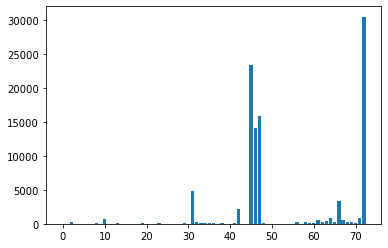

In [10]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
 
# load the dataset
def load_dataset(draft):
	# load the dataset as a pandas DataFrame
	data = read_csv(draft, header=1)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, 0:73]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('draft.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

features from 0 to 15
Feature 0: 7.852257
Feature 1: 58.743435
Feature 2: 5.221829
Feature 3: 5.698160
Feature 4: 3.160477
Feature 5: 0.573821
Feature 6: 0.778079
Feature 7: 152.827836


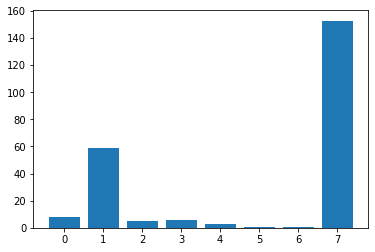

In [11]:
print('features from 0 to 15')
# load the dataset
def load_dataset(draft):
	# load the dataset as a pandas DataFrame
	data = read_csv(draft, header=1)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, 22:30]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('draft.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()


features from 16 to 25
Feature 0: nan
Feature 1: nan
Feature 2: 0.404654
Feature 3: 45.825810
Feature 4: 41.098723
Feature 5: 23.318034
Feature 6: 7.852257
Feature 7: 58.743435
Feature 8: 5.221829


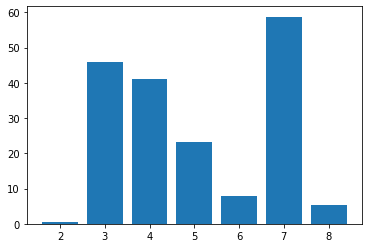

In [12]:
print('features from 16 to 25')
# load the dataset
def load_dataset(draft):
	# load the dataset as a pandas DataFrame
	data = read_csv(draft, header=1)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, 16:25]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('draft.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

features from 26 to 35
Feature 0: 3.160477
Feature 1: 0.573821
Feature 2: 0.778079
Feature 3: 152.827836


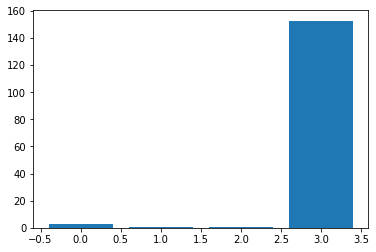

In [13]:
print('features from 26 to 35')
# load the dataset
def load_dataset(draft):
	# load the dataset as a pandas DataFrame
	data = read_csv(draft, header=1)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, 26:30]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('draft.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

features from 36 to 45
Feature 0: 49.278269
Feature 1: 13.290266
Feature 2: 61.153182
Feature 3: nan
Feature 4: 40.306921
Feature 5: 87.781242
Feature 6: 2220.158910
Feature 7: 3.454711
Feature 8: 5.088050


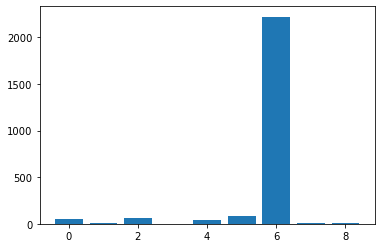

In [14]:
print('features from 36 to 45')
# load the dataset
def load_dataset(draft):
	# load the dataset as a pandas DataFrame
	data = read_csv(draft, header=1)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, 36:45]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('draft.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

features from 46 to 55
Feature 0: 14041.530995
Feature 1: 15930.144141
Feature 2: 136.098779
Feature 3: 0.258157
Feature 4: 4.016191
Feature 5: 14.894494
Feature 6: 0.616884
Feature 7: 0.236555
Feature 8: 0.059069


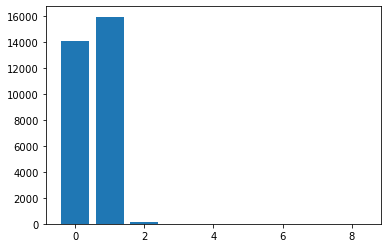

In [15]:
print('features from 46 to 55')
# load the dataset
def load_dataset(draft):
	# load the dataset as a pandas DataFrame
	data = read_csv(draft, header=1)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, 46:55]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('draft.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

features from 56 to 73
Feature 0: 198.802812
Feature 1: 6.110162
Feature 2: 223.089648
Feature 3: 135.452667
Feature 4: 161.247882
Feature 5: 500.798101
Feature 6: 203.585257
Feature 7: 387.168613
Feature 8: 789.543898
Feature 9: 231.671481
Feature 10: 3339.237517
Feature 11: 554.175097
Feature 12: 266.541164
Feature 13: 310.617272
Feature 14: 107.659937
Feature 15: 786.286348
Feature 16: 30471.181184


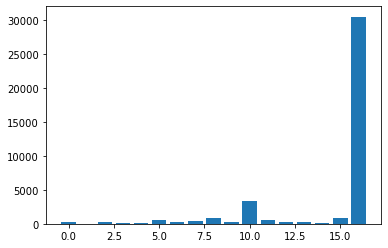

In [16]:
print('features from 56 to 73')
# load the dataset
def load_dataset(draft):
	# load the dataset as a pandas DataFrame
	data = read_csv(draft, header=1)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, 56:73]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('draft.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [17]:
dataset.dataframeName = 'darft.csv'

def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix ', fontsize=15)
    plt.show()

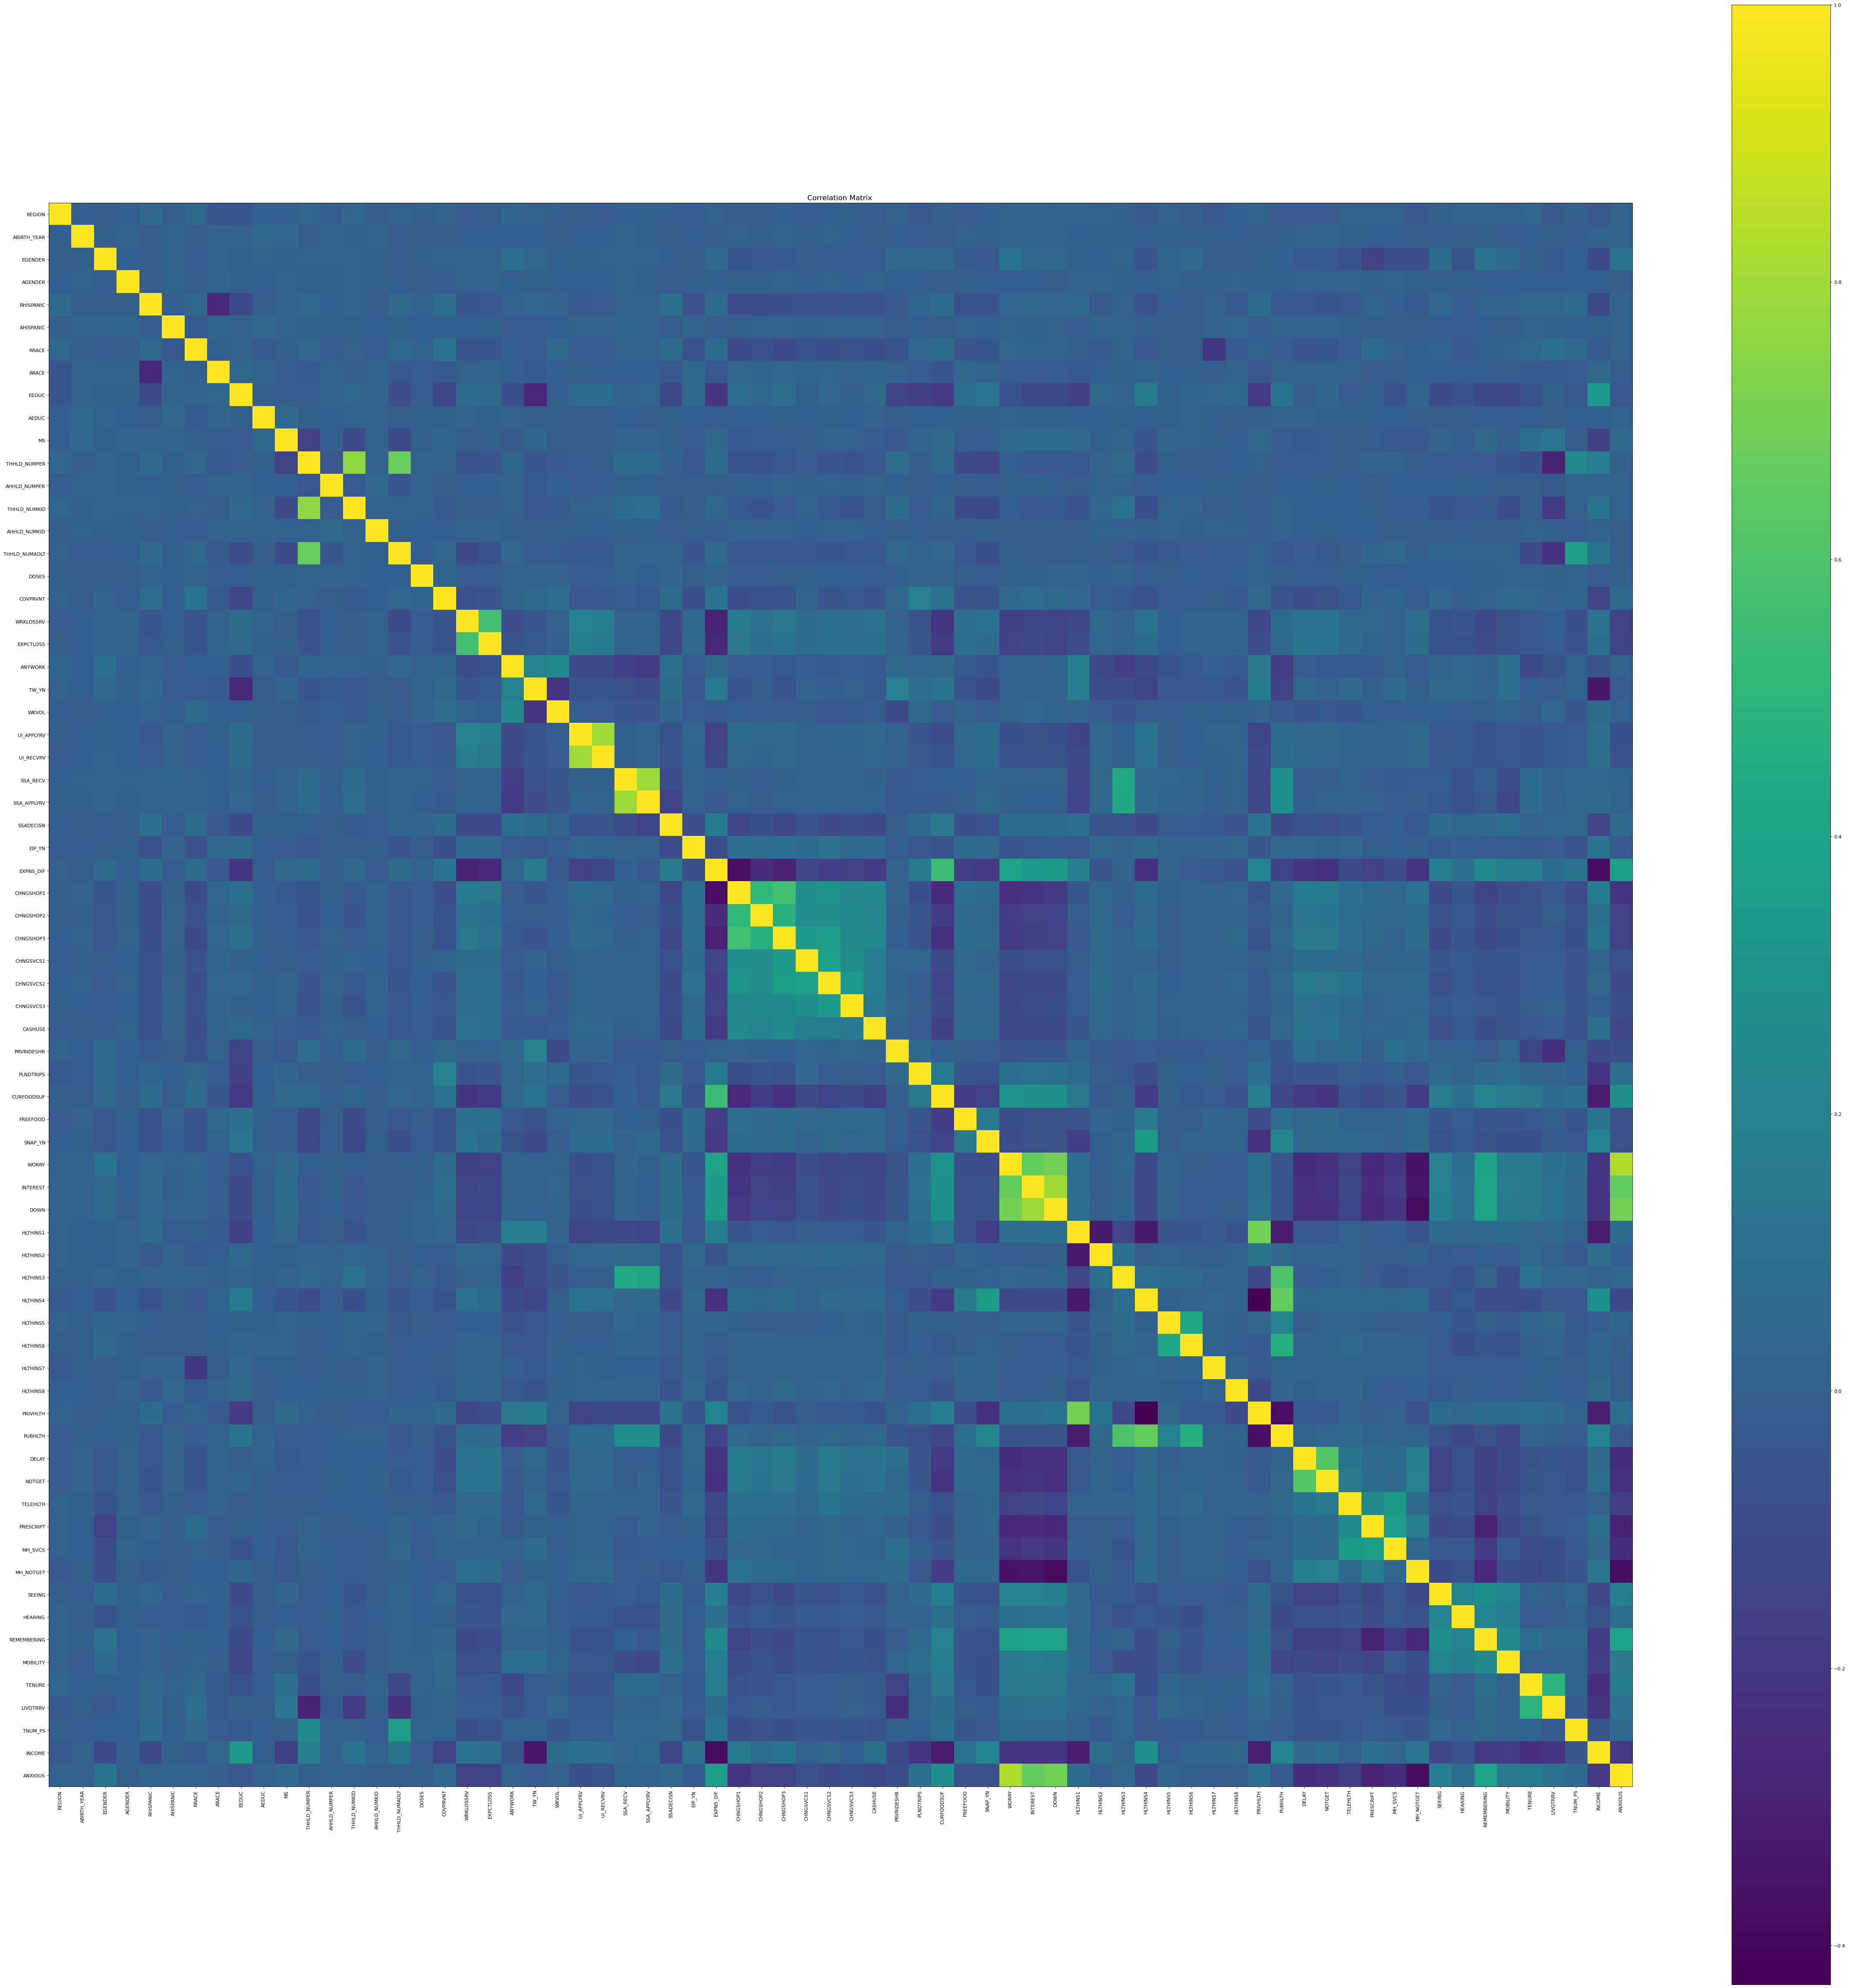

In [18]:
plotCorrelationMatrix(dataset,74)                                          